In [1]:
import pandas as pd

In [2]:
path = 'Social_Network_Ads.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dict = df.rename(columns={'User ID': 'Usuario ID', 'Gender': 'Genero', 'Age': 'Idade', 'EstimatedSalary': 'Salario Estimado', 'Purchased': 'Comprou'})
dict.head()

,Usuario ID,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [6]:
dict.isnull() # retorna valores nulos

,Usuario ID,Genero,Idade,Salario Estimado,Comprou
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [7]:
dict.isna() #retorna valores que não são numeros

,Usuario ID,Genero,Idade,Salario Estimado,Comprou
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
x = dict.iloc[:, [2,3]].values
y = dict.iloc[:, -1].values

In [9]:
#importando lib para fazer a divisão do dataset
from sklearn.model_selection import train_test_split

In [10]:
#divisão do dataset
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=2)

In [11]:
#padronização dos dados

sc = StandardScaler()
x_treino = sc.fit_transform(x_treino) #normalizo e crio o modelo
x_teste = sc.transform(x_teste) #normalizando

In [12]:
#criando o classificador 

algoritmo = SVC(kernel='linear', random_state=2)
algoritmo.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=2)

In [13]:
#predição

y_pred = algoritmo.predict(x_teste)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [14]:
#gerando a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[72  5]
 [13 30]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_10512\664401665.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


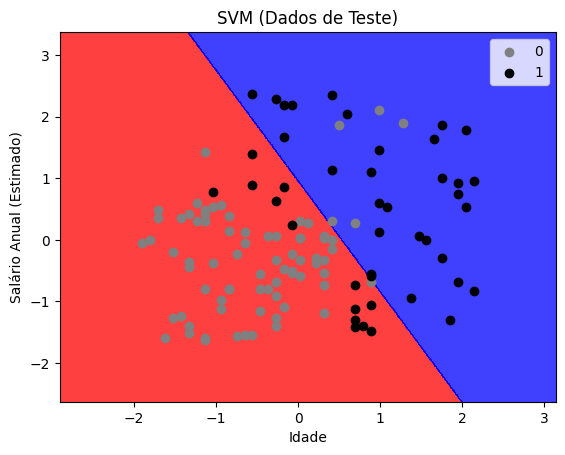

In [15]:
# Visualizando os resultados dos dados de teste:
_X, _y = x_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_10512\2099345247.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


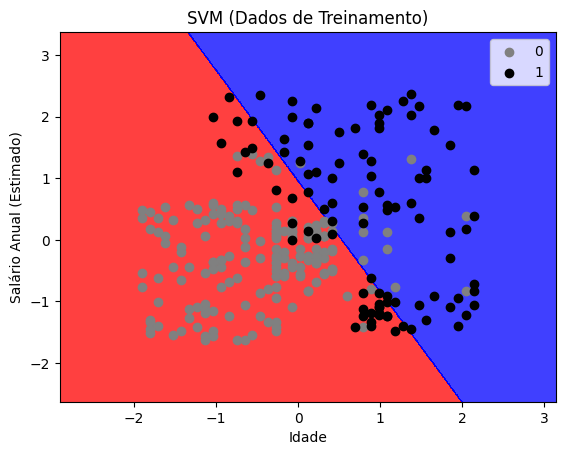

In [16]:
_X, _y = x_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()

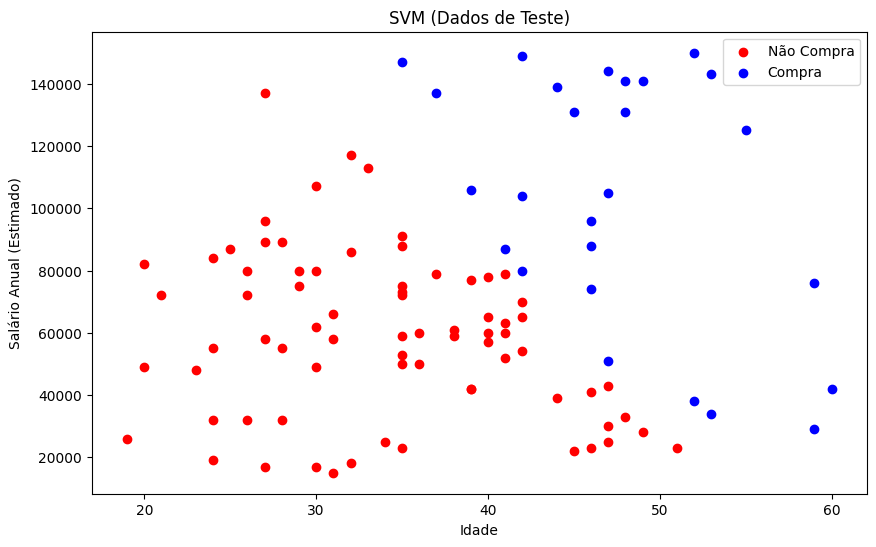

In [17]:
#Aplicando transformação nos dados
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Divisão da amostra
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=3)

# Padronização dos dados
sc = StandardScaler()
x_treino = sc.fit_transform(x_treino)
x_teste = sc.transform(x_teste)

# Treinamento do modelo SVM
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(x_treino, y_treino)

# Previsão dos resultados
y_prev = algoritmo.predict(x_teste)

# Inversão da escala para os dados de teste
x_teste_inverse = sc.inverse_transform(x_teste)

# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10, 6))

# Pontos para as duas classes
plt.scatter(x_teste_inverse[y_prev == 0, 0], x_teste_inverse[y_prev == 0, 1], c='red', label='Não Compra')
plt.scatter(x_teste_inverse[y_prev == 1, 0], x_teste_inverse[y_prev == 1, 1], c='blue', label='Compra')

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()